# 아트 장르 트레인 통일

# 이미지 흑백

In [4]:


import tensorflow as tf


gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)


sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [5]:
import os
import numpy as np
import shutil

# original_dataset_dir = 'C:\\Users\\Affinity\\Downloads\\best-artworks-of-all-time\\images\\images\\'

validation_dir = 'C:\\Users\\Affinity\\Documents\\img\\art\\art_genre_img\\validation'

test_dir = 'C:\\Users\\Affinity\\Documents\\img\\art\\art_genre_img\\test'

train_dir = 'C:\\Users\\Affinity\\Documents\\img\\art\\art_genre_img\\train2'

# l = os.listdir(original_dataset_dir)



In [6]:
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rescale=1./255,
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     vertical_flip=True,
#     fill_mode='nearest'
)



train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical'
)


Found 1200 images belonging to 6 classes.
Found 480 images belonging to 6 classes.
Found 480 images belonging to 6 classes.


In [ ]:
# l2 = os.listdir(train_dir)
# l2

In [ ]:
# import random


# for i in l2:
#     l_genre = os.listdir(train_dir + '/' + i)
#     random.shuffle(l_genre)
#     os.mkdir(train_dir + '/' + i + '2')
#     for j in range(200):
#         fname = l_genre[j]
#         src = os.path.join(train_dir + '/' + i, fname)
#         dst = os.path.join(train_dir + '/' + i + '2', fname)
#         shutil.copyfile(src, dst)
    

In [3]:
import numpy as np

from keras.preprocessing.image import ImageDataGenerator

from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150, 150, 3))




datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count, 6))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # 제너레이터는 루프 안에서 무한하게 데이터를 만들어내므로 모든 이미지를 한 번씩 처리하고 나면 중지합니다
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2400)
validation_features, validation_labels = extract_features(validation_dir, 960)
test_features, test_labels = extract_features(test_dir, 960)

train_features = np.reshape(train_features, (2400, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (960, 4 * 4 * 512))
test_features = np.reshape(test_features, (960, 4 * 4 * 512))




Instructions for updating:
Colocations handled automatically by placer.
Found 1200 images belonging to 6 classes.
Found 480 images belonging to 6 classes.
Found 480 images belonging to 6 classes.


In [7]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(6, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=50,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 2400 samples, validate on 960 samples
Epoch 1/50
2400/2400 [==============================] - 2s 689us/step - loss: 1.8886 - acc: 0.2125 - val_loss: 1.7125 - val_acc: 0.2833
Epoch 2/50
2400/2400 [==============================] - 1s 408us/step - loss: 1.6404 - acc: 0.3321 - val_loss: 1.6567 - val_acc: 0.3125
Epoch 3/50
2400/2400 [==============================] - 1s 409us/step - loss: 1.5357 - acc: 0.4025 - val_loss: 1.6338 - val_acc: 0.3188
Epoch 4/50
2400/2400 [==============================] - 1s 427us/step - loss: 1.4616 - acc: 0.4367 - val_loss: 1.6134 - val_acc: 0.3552
Epoch 5/50
2400/2400 [==============================] - 1s 427us/step - loss: 1.4011 - acc: 0.4613 - val_loss: 1.5963 - val_acc: 0.3510
Epoch 6/50
2400/2400 [==============================] - 1s 420us/step - loss: 1.3363 - acc: 0.5000 - val_loss:

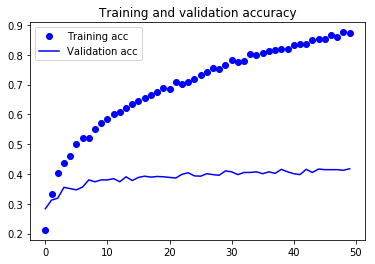

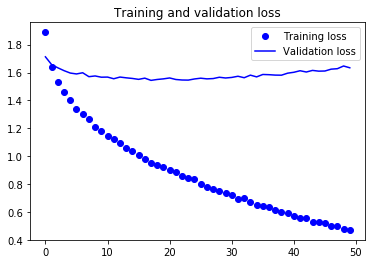

In [9]:
import matplotlib.pyplot as plt


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [11]:

test_loss, test_acc = model.evaluate(test_features, test_labels, batch_size=20)
print('test acc:', test_acc)

960/960 [==============================] - 1s 775us/step
test acc: 0.3916666683120032


In [ ]:
# import keras

# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# from keras.optimizers import Adam

# from keras.applications import VGG16

# conv_base = VGG16(weights='imagenet',
#                  include_top=False,
#                  input_shape=(100, 100, 3))

# model = Sequential()
# model.add(conv_base)
# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dense(6, activation='softmax'))

# adam = Adam()

# model.compile(loss='categorical_crossentropy',
#              optimizer=adam,
#              metrics=['acc'])


# history = model.fit_generator(
#     train_generator,
#     steps_per_epoch=100,
#     epochs=300,
#     validation_data=validation_generator,
#     validation_steps=150
# )


In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


model = Sequential()

model.add(Conv2D(32, (5, 5), activation='relu',
         input_shape=(150, 150, 3)))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (4, 4), activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=60,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=24
)



Epoch 1/20
60/60 [==============================] - 26s 435ms/step - loss: 2.1201 - acc: 0.2083 - val_loss: 1.7265 - val_acc: 0.2208
Epoch 2/20
60/60 [==============================] - 26s 430ms/step - loss: 1.5719 - acc: 0.3442 - val_loss: 1.6861 - val_acc: 0.3063
Epoch 3/20
60/60 [==============================] - 26s 433ms/step - loss: 1.4797 - acc: 0.3792 - val_loss: 1.7047 - val_acc: 0.2667
Epoch 4/20
60/60 [==============================] - 27s 453ms/step - loss: 1.4943 - acc: 0.3900 - val_loss: 1.6803 - val_acc: 0.2833
Epoch 5/20
60/60 [==============================] - 26s 435ms/step - loss: 1.4227 - acc: 0.4450 - val_loss: 1.6295 - val_acc: 0.3271
Epoch 6/20
60/60 [==============================] - 28s 472ms/step - loss: 1.2588 - acc: 0.5092 - val_loss: 1.6131 - val_acc: 0.3063
Epoch 7/20
60/60 [==============================] - 29s 482ms/step - loss: 1.1416 - acc: 0.5617 - val_loss: 1.6507 - val_acc: 0.3104
Epoch 8/20
60/60 [==============================] - 30s 494ms/step - 

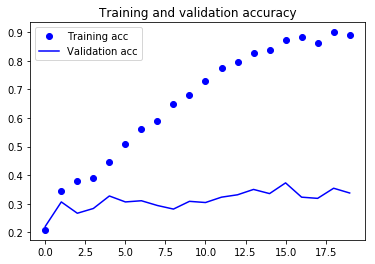

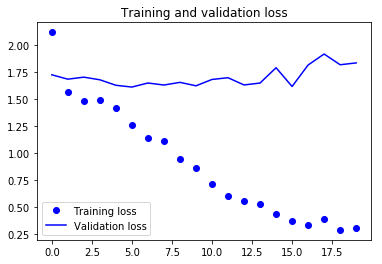

In [13]:
import matplotlib.pyplot as plt


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# 라벨 줄이기

In [17]:
import os
import numpy as np
import shutil

# original_dataset_dir = 'C:\\Users\\Affinity\\Downloads\\best-artworks-of-all-time\\images\\images\\'

validation_dir = 'C:\\Users\\Affinity\\Documents\\img\\art\\art_genre_img\\validation2'

test_dir = 'C:\\Users\\Affinity\\Documents\\img\\art\\art_genre_img\\test2'

train_dir = 'C:\\Users\\Affinity\\Documents\\img\\art\\art_genre_img\\train3'

# l = os.listdir(original_dataset_dir)



In [18]:
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rescale=1./255,
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     vertical_flip=True,
#     fill_mode='nearest'
)



train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical'
)


Found 600 images belonging to 3 classes.
Found 240 images belonging to 3 classes.
Found 240 images belonging to 3 classes.


In [20]:
import numpy as np

from keras.preprocessing.image import ImageDataGenerator

from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150, 150, 3))




datagen = ImageDataGenerator(
    rescale=1./255,
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     vertical_flip=True,
#     fill_mode='nearest'
)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count, 3))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # 제너레이터는 루프 안에서 무한하게 데이터를 만들어내므로 모든 이미지를 한 번씩 처리하고 나면 중지합니다
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 600)
validation_features, validation_labels = extract_features(validation_dir,240)
test_features, test_labels = extract_features(test_dir, 240)

train_features = np.reshape(train_features, (600, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (240, 4 * 4 * 512))
test_features = np.reshape(test_features, (240, 4 * 4 * 512))




Found 600 images belonging to 3 classes.
Found 240 images belonging to 3 classes.
Found 240 images belonging to 3 classes.


In [22]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=50,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))





Train on 600 samples, validate on 240 samples
Epoch 1/50
600/600 [==============================] - 1s 1ms/step - loss: 1.2873 - acc: 0.3500 - val_loss: 0.9962 - val_acc: 0.5458
Epoch 2/50
600/600 [==============================] - 0s 387us/step - loss: 1.0910 - acc: 0.4767 - val_loss: 0.9332 - val_acc: 0.5917
Epoch 3/50
600/600 [==============================] - 0s 387us/step - loss: 0.9585 - acc: 0.5283 - val_loss: 0.8712 - val_acc: 0.6417
Epoch 4/50
600/600 [==============================] - 0s 386us/step - loss: 0.9014 - acc: 0.5867 - val_loss: 0.8209 - val_acc: 0.6500
Epoch 5/50
600/600 [==============================] - 0s 407us/step - loss: 0.8255 - acc: 0.6200 - val_loss: 0.7940 - val_acc: 0.6375
Epoch 6/50
600/600 [==============================] - 0s 391us/step - loss: 0.7747 - acc: 0.6500 - val_loss: 0.7707 - val_acc: 0.6500
Epoch 7/50
600/600 [==============================] - 0s 392us/step - loss: 0.6882 - acc: 0.7200 - val_loss: 0.7548 - val_acc: 0.6708
Epoch 8/50
600/600

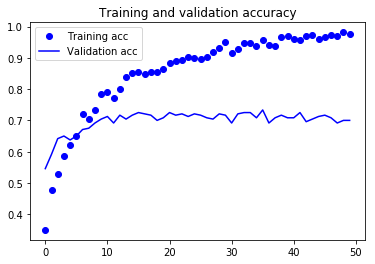

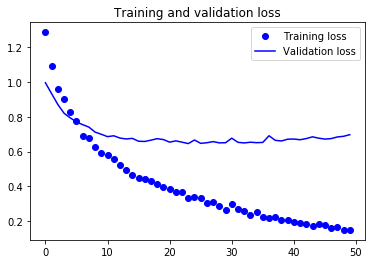

In [23]:
import matplotlib.pyplot as plt


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# 이미지 증ㅇ식

In [24]:
import numpy as np

from keras.preprocessing.image import ImageDataGenerator

from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150, 150, 3))




datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count, 3))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # 제너레이터는 루프 안에서 무한하게 데이터를 만들어내므로 모든 이미지를 한 번씩 처리하고 나면 중지합니다
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 6000)
validation_features, validation_labels = extract_features(validation_dir,2400)
test_features, test_labels = extract_features(test_dir, 2400)

train_features = np.reshape(train_features, (6000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (2400, 4 * 4 * 512))
test_features = np.reshape(test_features, (2400, 4 * 4 * 512))




Found 600 images belonging to 3 classes.
Found 240 images belonging to 3 classes.
Found 240 images belonging to 3 classes.


(6000, 8192)

In [25]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=50,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))





Train on 6000 samples, validate on 2400 samples
Epoch 1/50
6000/6000 [==============================] - 3s 578us/step - loss: 0.9430 - acc: 0.5373 - val_loss: 0.8149 - val_acc: 0.6308
Epoch 2/50
6000/6000 [==============================] - 3s 455us/step - loss: 0.7178 - acc: 0.6820 - val_loss: 0.7747 - val_acc: 0.6404
Epoch 3/50
6000/6000 [==============================] - 3s 473us/step - loss: 0.6413 - acc: 0.7287 - val_loss: 0.7459 - val_acc: 0.6583
Epoch 4/50
6000/6000 [==============================] - 3s 432us/step - loss: 0.5863 - acc: 0.7510 - val_loss: 0.7537 - val_acc: 0.6562
Epoch 5/50
6000/6000 [==============================] - 3s 430us/step - loss: 0.5468 - acc: 0.7738 - val_loss: 0.7378 - val_acc: 0.6588
Epoch 6/50
6000/6000 [==============================] - 3s 453us/step - loss: 0.5127 - acc: 0.7935 - val_loss: 0.7389 - val_acc: 0.6533
Epoch 7/50
6000/6000 [==============================] - 3s 471us/step - loss: 0.4849 - acc: 0.8088 - val_loss: 0.7432 - val_acc: 0.6550


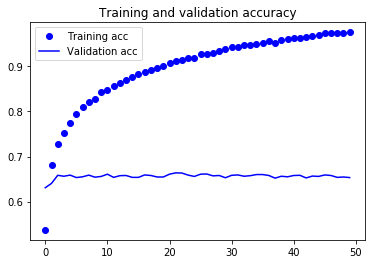

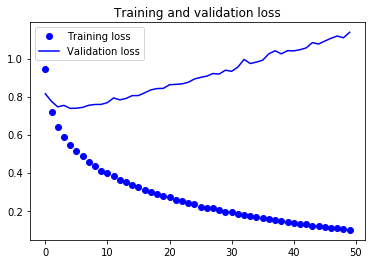

In [26]:
import matplotlib.pyplot as plt


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# 흑백